In [2]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt



In [3]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [4]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


# we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

C:\Users\Christian Møller\AppData\Local\Temp\ipykernel_17292\1119189001.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('true label: %d' % y[idx])


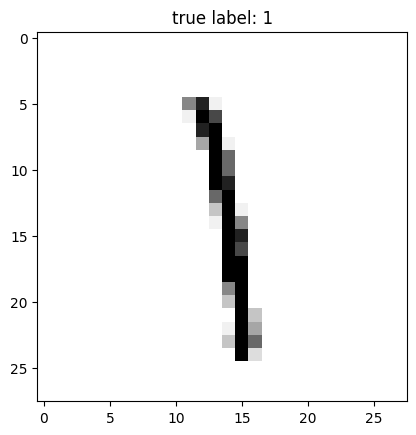

In [5]:
#inspect data
plot_digit(X, y, 700)

In [6]:
# create a loss function:
def avrLoss(y,yhat):
  eps=1e-3
  yhat=np.maximum(yhat,eps) #remove 0's
  yhat=np.minimum(yhat,1-eps) #remove 1's


  loss=-(y*np.log(yhat)+(1-y)*np.log(1-yhat))

  return np.mean(loss)


In [7]:
#test loss function:
loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)


In [8]:
#create a sigmoid
def sigmoid(x):
  x=np.maximum(x,-700)
  return 1/(1+np.exp(-x))

In [9]:
#check sigmoid

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [10]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [12]:
#train
w=np.zeros((Xtrain.shape[1],1))
b=0
nEpoch=50

accuracy=np.zeros(nEpoch)
trainRate=0.005
for iTrain in range(nEpoch):
  #evaluate
  a=sigmoid(np.matmul(Xtrain,w)+b)

  #update weights
  wgrad=np.matmul(Xtrain.T,(a-ytrain))/ytrain.size
  bgrad=np.sum(a.T-ytrain)/ytrain.size

  assert(wgrad.shape == w.shape)
  assert(np.isscalar(bgrad))

  w-=wgrad*trainRate
  b-=bgrad*trainRate

  #calculate loss & accuracy
  loss=avrLoss(ytrain,a)
  yhat=a>.5
  accuracy[iTrain]=np.mean(yhat==ytrain)

  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

0 0.6931471805599454 0.48
10 0.020734085415436546 0.9971428571428571
20 0.0011287201951856408 1.0
30 0.0010033980814399162 1.0
40 0.0010014964241759504 1.0
train accuracy: 100.0 %
test accuracy: 99.33333333333333 %


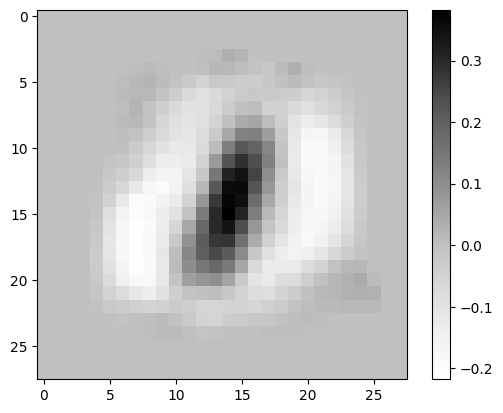

In [13]:
#see what it does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

c:\mamba2\envs\deeplearning\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


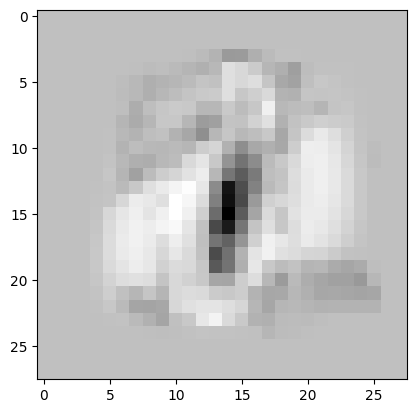

In [14]:
#let's just quickly compare with a premade logistic regression implementation from sklearn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X)
clf.score(X, y)

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()